In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
file_path = "Ice_cream selling data.csv"
df = pd.read_csv(file_path)
df.head()


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


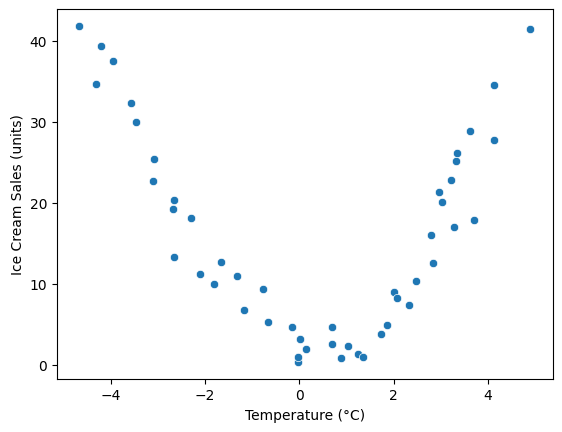

In [ ]:
sns.scatterplot(x='Temperature (°C)',y='Ice Cream Sales (units)',data=df)
plt.show()

In [32]:
X=df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [33]:
poly = PolynomialFeatures(degree=3)

In [34]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(X_poly_train,y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_poly_test)

In [38]:
mean_absolute_error(y_test,y_pred)

3.049234370485593

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(3.30076808646321)

In [40]:
r2_score(y_test,y_pred)

0.8776306156584226

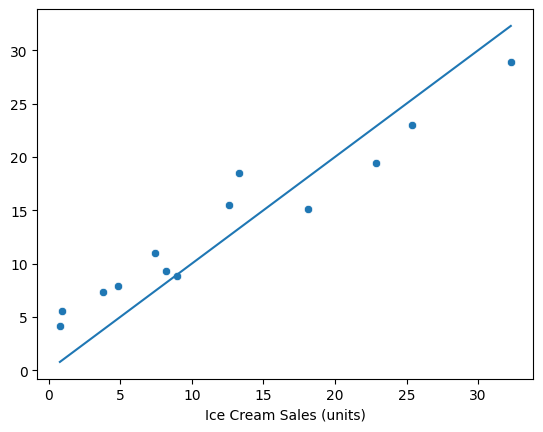

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val] )
plt.show()